In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("employee_retention.csv")
data

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [4]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
#checking the data types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
#Statistic functions
data.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     14999.0    0.612834   0.248631   0.09    0.44    0.64   
last_evaluation        14999.0    0.716102   0.171169   0.36    0.56    0.72   
number_project         14999.0    3.803054   1.232592   2.00    3.00    4.00   
average_montly_hours   14999.0  201.050337  49.943099  96.00  156.00  200.00   
time_spend_company     14999.0    3.498233   1.460136   2.00    3.00    3.00   
Work_accident          14999.0    0.144610   0.351719   0.00    0.00    0.00   
left                   14999.0    0.238083   0.425924   0.00    0.00    0.00   
promotion_last_5years  14999.0    0.021268   0.144281   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.87    1.0  
number_project           5.00    7.0  
average_montly_hours   245.00  310.0  
time_spend_company       4.00   10.0  
Work_accident            0.00    1.0  
left                     0.00    1.0  
promotion_last_5years    0.00    1.0

In [7]:
#checking for null values
data.isnull().values.any()

False

In [8]:
#count of people who left, 1 means left
left=data['left'].value_counts()
left

0    11428
1     3571
Name: left, dtype: int64

In [9]:
#people who left
notworking=data[data['left']==1]
print("Left:",notworking.shape)
#people still working
working=data[data['left']==0]
print("working:",working.shape)

Left: (3571, 10)
working: (11428, 10)


# Understanding the possible reasons for leaving the company

In [10]:
leftemp=data.groupby('left')
leftemp.mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

([<matplotlib.patches.Wedge at 0x2256d94fbc8>,
 [Text(-0.8063869332849134, 0.7481578134507135, 'Still working'),
  Text(0.8063869683087074, -0.7481577757010162, 'Left')])

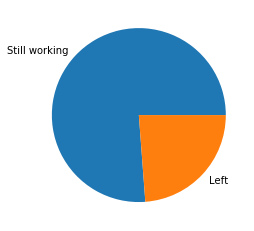

In [11]:
plt.pie(left,labels=['Still working','Left'])
#blue means still working, orange means left

In [12]:
#predicting accuray based on the data manually
(11428-3571)/(11428)

0.6875218760938047

# Visualisation

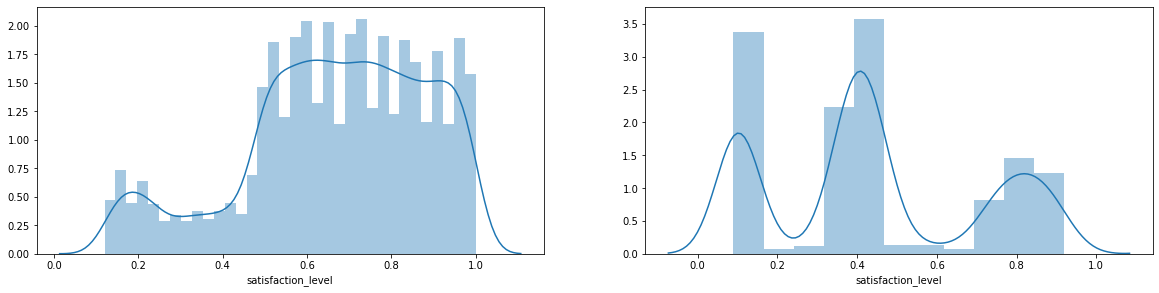

In [13]:
#distribution of satsifacction level
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(working['satisfaction_level'],ax=ax1)
sns.distplot(notworking['satisfaction_level'],ax=ax2)

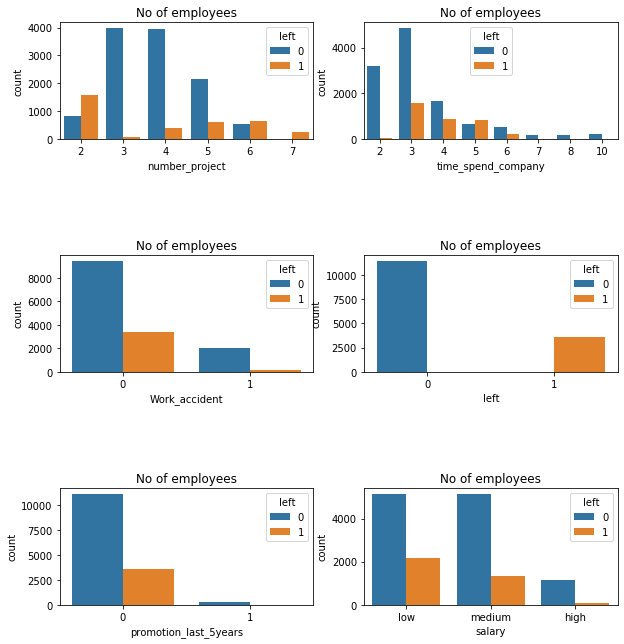

In [14]:
#plottingnu all the required data
req=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','salary']
fig=plt.subplots(figsize=(10,15))
for i,j in enumerate(req):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=data,hue='left')
    plt.xticks(rotation=0)
    plt.title("No of employees")
            

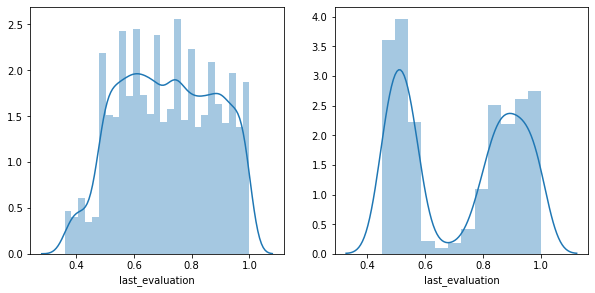

In [15]:
#distribution of last evaluation
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(working['last_evaluation'],ax=ax1)
sns.distplot(notworking['last_evaluation'],ax=ax2)

([<matplotlib.patches.Wedge at 0x2256ed81cc8>,
 [Text(0.6905840124170545, 0.856208924149919, 'sales'),
  Text(-0.8091411061333481, 0.7451782809269887, 'technical'),
  Text(-1.0305754747864957, -0.3845961398253878, 'support'),
  Text(-0.5130071649686049, -0.9730486363439779, 'IT'),
  Text(-0.06141861856946621, -1.0982840039320516, 'product_mng'),
  Text(0.3384458373809015, -1.0466395822629395, 'RandD'),
  Text(0.6837832426863538, -0.8616498575531335, 'marketing'),
  Text(0.9393800838738257, -0.5723329957474097, 'accounting'),
  Text(1.0611496733557753, -0.28976088545028245, 'management'),
  Text(1.0964768353217698, -0.08796902638290853, 'hr')])

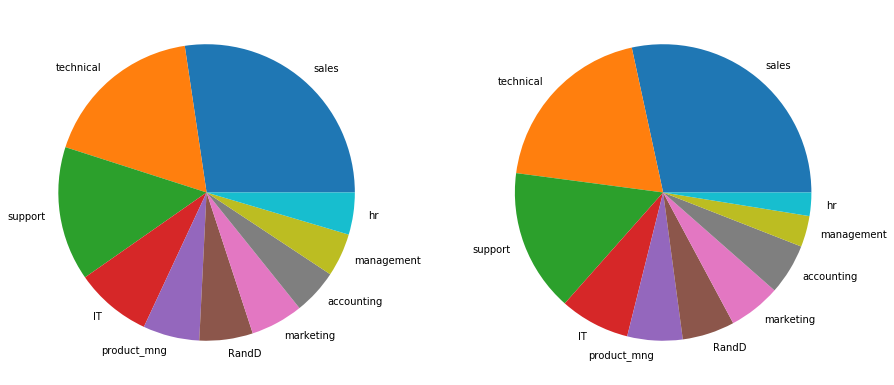

In [16]:
#pie plot for the sales distribution
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

workingcount=working['sales'].value_counts()
notworkingcount=notworking['sales'].value_counts()

ax1.pie(workingcount,labels=workingcount.index)
ax2.pie(notworkingcount,labels=workingcount.index)

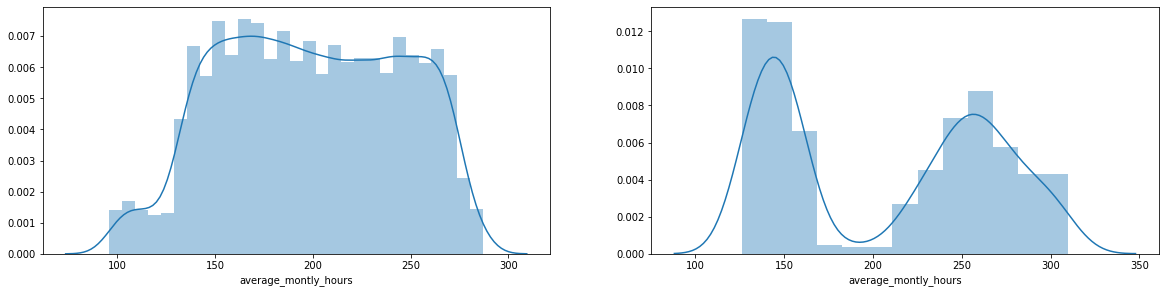

In [17]:
#average working hours
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)

sns.distplot(working['average_montly_hours'],ax=ax1)
sns.distplot(notworking['average_montly_hours'],ax=ax2)

# Corelation analysis
### No of average monthly hours is related to the no of projects given and the last evaluaton



In [18]:
data.corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   

                       Work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_montly_hours       -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
Work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

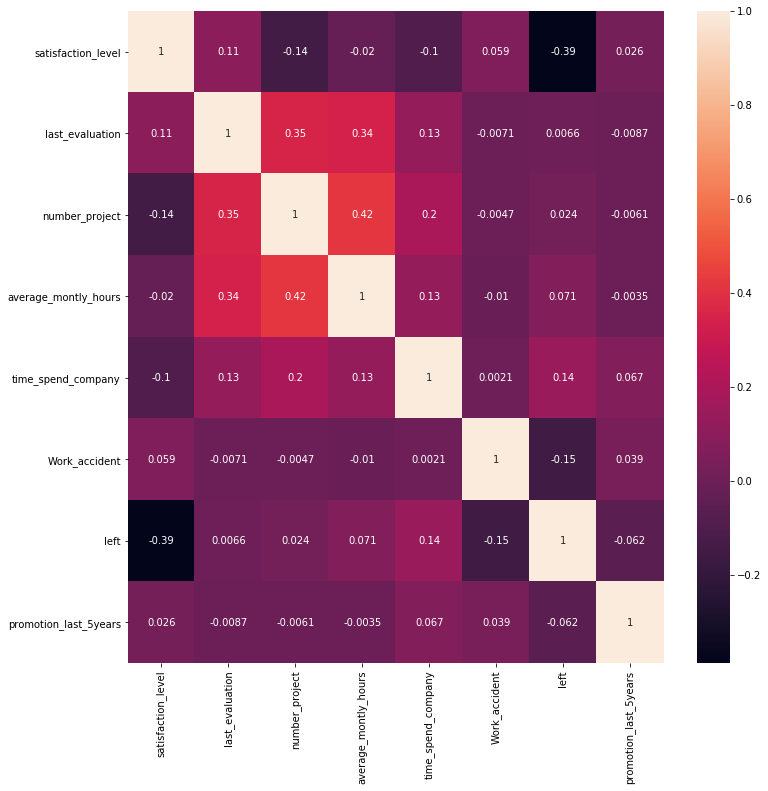

In [19]:
#VISUALIZATION OF CORELATION
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

# Pre-processing data
### Model Generation

In [20]:
# Non numerical to numerical values
from sklearn.preprocessing import LabelEncoder
data['salary'] = LabelEncoder().fit_transform(data.salary)
data['sales'] = LabelEncoder().fit_transform(data.sales)
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0      7   
1                   6              0     1                      0      7   
2                   4              0     1                      0      7   
3                   5              0     1                      0      7   
4                   3              0     1                      0      7   

   salary  
0       1  
1       2  
2       2  
3       1  
4       1

In [21]:
#all the columns are converted to numerical columns
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                      int32
salary                     int32
dtype: object

##### Data Splitting

# Training data

In [22]:
X=data.drop(['left','sales'],axis=1)
y=data['left']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
print(X_train.shape)  # Input train ---> Output train
print(X_test.shape)   # Input train ---> Output test
print(y_train.shape)  # Output train
print(y_test.shape)   # Output test

(11249, 8)
(3750, 8)
(11249,)
(3750,)


### Scaling data

In [25]:
#importing the library and asssigning to an object
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [26]:
X_train_sc.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            1.235756        -1.028138        0.982659              0.041612   
1            0.952848         1.604499        0.982659             -0.499904   
2            0.144542         0.726953       -0.642680             -0.239174   
3           -0.421273         0.843960        0.169989             -0.098781   
4            1.397417        -1.203648       -0.642680              0.803745   

   time_spend_company  Work_accident  promotion_last_5years    salary  
0           -0.340130      -0.410173              -0.146704  1.035296  
1            0.346786      -0.410173              -0.146704 -0.564875  
2           -1.027047       2.437997              -0.146704 -0.564875  
3           -1.027047      -0.410173              -0.146704 -0.564875  
4            1.720619       2.437997              -0.146704 -0.564875

In [27]:
X_test_sc.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.225372        -1.905684       -1.455349              0.121836   
1           -0.421273         1.545996        0.169989              0.883970   
2            0.184957        -1.028138       -1.455349             -1.302150   
3           -0.340442         0.551444       -0.642680              1.485654   
4            0.872018         1.545996        0.169989              1.164756   

   time_spend_company  Work_accident  promotion_last_5years    salary  
0            2.407536      -0.410173              -0.146704  1.035296  
1           -0.340130      -0.410173              -0.146704  1.035296  
2           -1.027047      -0.410173              -0.146704 -0.564875  
3           -1.027047      -0.410173              -0.146704 -0.564875  
4            1.033703      -0.410173              -0.146704  1.035296

# Train svm model

In [28]:
from sklearn import preprocessing,svm

In [112]:
#initializing svm object
clfsvm=svm.SVC(probability=True)

#fitting in into train data
clfsvm.fit(X_train_sc,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
#finding accuracy through scoring process
acc=clfsvm.score(X_test_sc,y_test)
acc

0.9632

In [31]:
#displaying all the columns in the data frame 
pd.set_option('display.max_columns',None)

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

# Logistic regression model

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
#We have to apply this object(log_reg) to the training data
log_reg.fit(X_train, y_train)
## Predicting on the training data
y_train_pred = log_reg.predict(X_train)
y_test_pred=log_reg.predict(X_test)

In [34]:
# Confusion matrix for training data
# Confusion matrix(Actual Values, Predicted values)
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
conf = confusion_matrix(y_train, y_train_pred)
conf

array([[7940,  635],
       [2020,  654]], dtype=int64)

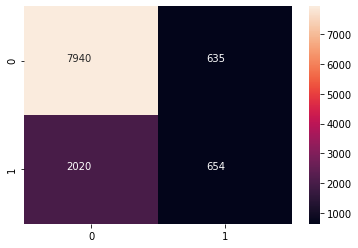

In [35]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f',
            annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

In [36]:
conf

array([[7940,  635],
       [2020,  654]], dtype=int64)

In [37]:
## accuracy of the performance of the model
accuracy_score(y_train, y_train_pred)

0.7639790203573651

In [38]:
#accuracy of the test data
acc=log_reg.score(X_test,y_test)
acc

0.7656

In [39]:
print(classification_report(y_train,y_train_pred,zero_division= 0 or 1))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      8575
           1       0.51      0.24      0.33      2674

    accuracy                           0.76     11249
   macro avg       0.65      0.59      0.59     11249
weighted avg       0.73      0.76      0.73     11249



In [40]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [41]:
s=np.array(X.iloc[1000,:])
s

array([  0.87,   1.  ,   4.  , 258.  ,   5.  ,   1.  ,   1.  ,   2.  ])

In [42]:
log_reg.predict(s.reshape(1,-1))

array([0], dtype=int64)

In [43]:
print(classification_report(y_test,y_test_pred,zero_division= 0 or 1))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2853
           1       0.52      0.27      0.36       897

    accuracy                           0.77      3750
   macro avg       0.66      0.60      0.61      3750
weighted avg       0.73      0.77      0.74      3750



# **Decision Tree Classifier**


In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_sc, y_train)
acc = clf.score(X_test_sc, y_test)
acc

0.976

In [45]:
y_train_pred=clf.predict(X_train_sc)
y_test_pred=clf.predict(X_test_sc)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)
print(classification_report(y_train,y_train_pred))
print("------------------------------------------------------")
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8575
           1       1.00      1.00      1.00      2674

    accuracy                           1.00     11249
   macro avg       1.00      1.00      1.00     11249
weighted avg       1.00      1.00      1.00     11249

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2853
           1       0.94      0.97      0.95       897

    accuracy                           0.98      3750
   macro avg       0.96      0.97      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [46]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

1.0

In [47]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred) 

1.0

# Randon forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy',
                              random_state=0)
forest.fit(X_train_sc,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
#accuracy of training set
forest.score(X_train_sc,y_train)

0.998222064183483

In [59]:
print(accuracy_score(y_test,forest.predict(X_test_sc)))

0.9890666666666666


##### Cross Validation
Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Random Forest model.

In [60]:
#k fold
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train_sc, y_train,
                                          cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.990


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2853
           1       0.99      0.96      0.98       897

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



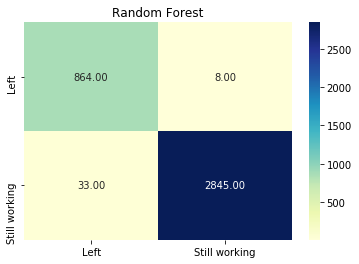

In [66]:
#Heatmap
y_pred=forest.predict(X_test_sc)
import sklearn.metrics as metrics
import seaborn as sns
cm= metrics.confusion_matrix(y_pred,y_test,[1,0])
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt='.2f',xticklabels = ["Left", "Still working"] , yticklabels = ["Left", "Still working"] )
plt.title('Random Forest')
plt.savefig('random_forest')


# Knn classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=40,metric='euclidean')
knn.fit(X_train_sc,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [68]:
y_train_pred = knn.predict(X_train_sc)
y_train_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [69]:
#using confusion matrix
y_pred=knn.predict(X_test_sc)
confusion_matrix(y_test,y_pred)

array([[2752,  101],
       [  82,  815]], dtype=int64)

In [70]:
print(accuracy_score(y_test,y_pred))

0.9512


In [71]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8575
           1       0.89      0.90      0.89      2674

    accuracy                           0.95     11249
   macro avg       0.93      0.93      0.93     11249
weighted avg       0.95      0.95      0.95     11249



# k means clustering

In [104]:
from sklearn.cluster import KMeans
#filtering data
le=data[['satisfaction_level','last_evaluation']][data.left==1]
#creating groups using k-means clustering
kmeans=KMeans(n_clusters=3,random_state=0).fit(le)

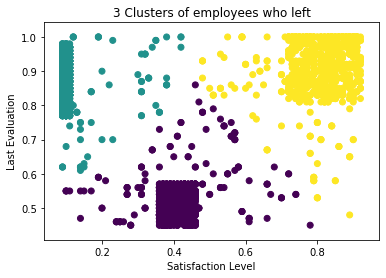

In [105]:
# Add new column "label" annd assign cluster labels.
notworking['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(notworking['satisfaction_level'], notworking['last_evaluation'], 
            c=notworking['label'],cmap='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [106]:
#Model building using Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(X_train_sc,y_train)

y_pred=gb.predict(X_test_sc)

In [107]:
#evaluating model performance
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

print("Precision:",metrics.precision_score(y_test,y_pred))

print("Recall:",metrics.recall_score(y_test,y_pred))

accuracy: 0.9773333333333334
Precision: 0.9720930232558139
Recall: 0.9319955406911928


### ROC-AUC Curve for all the algorithms used above

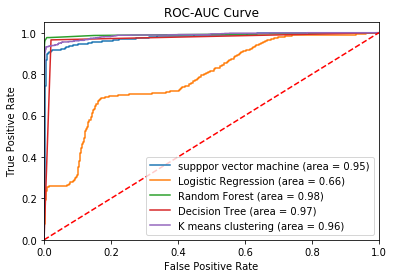

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Logistic regression
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test_sc))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_sc)[:,1])
#Random forest
rf_roc_auc = roc_auc_score(y_test, forest.predict(X_test_sc))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, forest.predict_proba(X_test_sc)[:,1])
#Desicion tree
dt_roc_auc = roc_auc_score(y_test, clf.predict(X_test_sc))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, clf.predict_proba(X_test_sc)[:,1])
#K means clustering
cl_roc_auc = roc_auc_score(y_test, gb.predict(X_test_sc))
cl_fpr, cl_tpr, cl_thresholds = roc_curve(y_test, gb.predict_proba(X_test_sc)[:,1])
#support vector machine
svm_roc_auc = roc_auc_score(y_test, clfsvm.predict(X_test_sc))
svm_fpr, svm_tpr,svm_thresholds = roc_curve(y_test, clfsvm.predict_proba(X_test_sc)[:,1])
plt.figure()
plt.plot(svm_fpr, svm_tpr, label='supppor vector machine (area = %0.2f)' % svm_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(cl_fpr, cl_tpr, label='K means clustering (area = %0.2f)' % cl_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### Feature importance acc to Random forest, influencing the retention

In [125]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management'])
importance = forest.feature_importances_
indexes = importance.argsort()
for i in indexes:
    print('{}-{:.2f}%'.format(feature_labels[i], (importance[i] *100.0)))

department_hr-0.17%
department_RandD-1.00%
department_management-1.46%
last_evaluation-14.06%
time_spend_company-14.15%
Work_accident-16.84%
promotion_last_5years-19.88%
satisfaction_level-32.43%
